In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('../data/DataSet2.csv')
df.head(10)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98
5,5,Hollywood Revue,1928/29,Metro-Goldwyn-Mayer,Nominee,1929,130,"Comedy,Music",5.7,"2,004",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689f22d5-a700-4ce1-b9be-65652f32c186
6,6,In Old Arizona,1928/29,Fox,Nominee,1928,95,Western,5.6,"1,019",...,Rotten,56.0,9.0,Spilled,38.0,356.0,2.0,5.0,4.0,a0644f19-a136-44c2-ab5d-50978ef19608
7,7,The Patriot,1928/29,Paramount Famous Lasky,Nominee,1928,113,"Drama,History,Thriller",7.4,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5d4ef7bd-2f81-47f3-9305-2c8fe140d4e4
8,8,All Quiet on the Western Front,1929/30,Universal,Winner,1930,152,"Drama,War",8.1,"59,214",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281742f9-3b4e-480d-b704-c8c15de6b721
9,9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,"2,079",...,Fresh,75.0,8.0,Upright,69.0,323.0,0.0,6.0,2.0,297aa285-29d7-4a22-b833-c5632ab3e562


In [3]:
df.columns

Index(['Unnamed: 0', 'Film', 'Oscar Year', 'Film Studio/Producer(s)', 'Award',
       'Year of Release', 'Movie Time', 'Movie Genre', 'IMDB Rating',
       'IMDB Votes', 'Movie Info', 'Genres', 'Critic Consensus',
       'Content Rating', 'Directors', 'Authors', 'Actors',
       'Original Release Date', 'Streaming Release Date', 'Production Company',
       'Tomatometer Status', 'Tomatometer Rating', 'Tomatometer Count',
       'Audience Status', 'Audience Rating', 'Audience Count',
       'Tomatometer Top Critics Count', 'Tomatometer Fresh Critics Count',
       'Tomatometer Rotten Critics Count', 'Film ID'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        438 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic C

Сразу удалим стобец "Unnamed: 0"

In [5]:
df.drop('Unnamed: 0', axis= 1 , inplace= True )

### Обработка пропущенных знаечний

Посмотрим число пропущенных значений

In [6]:
df.isna().sum()

Film                                  0
Oscar Year                            0
Film Studio/Producer(s)               0
Award                                 0
Year of Release                       0
Movie Time                            0
Movie Genre                           0
IMDB Rating                           0
IMDB Votes                            0
Movie Info                          133
Genres                              132
Critic Consensus                    232
Content Rating                      132
Directors                           134
Authors                             134
Actors                              132
Original Release Date               132
Streaming Release Date              133
Production Company                  132
Tomatometer Status                  132
Tomatometer Rating                  132
Tomatometer Count                   132
Audience Status                     135
Audience Rating                     132
Audience Count                      132


Из данного списка видно, что из 571 фильма, представленного в датасете, у 132 фильмов отсутствует информация в 19 столбцах из 30. Удалим эти фильмы из таблицы, потому что восстановить данные этих столбцов восстановить сложно, а подставление нулей или медианы очень сильно скажется на оценке содержимого. 

In [7]:
df.dropna(subset=['Production Company'], how='all', inplace=True)

In [8]:
df.isna().sum()

Film                                  0
Oscar Year                            0
Film Studio/Producer(s)               0
Award                                 0
Year of Release                       0
Movie Time                            0
Movie Genre                           0
IMDB Rating                           0
IMDB Votes                            0
Movie Info                            1
Genres                                0
Critic Consensus                    100
Content Rating                        0
Directors                             2
Authors                               2
Actors                                0
Original Release Date                 0
Streaming Release Date                1
Production Company                    0
Tomatometer Status                    0
Tomatometer Rating                    0
Tomatometer Count                     0
Audience Status                       3
Audience Rating                       0
Audience Count                        0


В столбце "Critic Consensus" проставим unknown, потому что восстановить его невозможно, это же сделаем со столбцами "Movie Info", "Directors", "Authors"

In [9]:
df['Critic Consensus'] = df['Critic Consensus'].fillna('Unknown')
df['Movie Info'] = df['Movie Info'].fillna('Unknown')
df['Directors'] = df['Directors'].fillna('Unknown')
df['Authors'] = df['Authors'].fillna('Unknown')

In [10]:
df.isna().sum()

Film                                0
Oscar Year                          0
Film Studio/Producer(s)             0
Award                               0
Year of Release                     0
Movie Time                          0
Movie Genre                         0
IMDB Rating                         0
IMDB Votes                          0
Movie Info                          0
Genres                              0
Critic Consensus                    0
Content Rating                      0
Directors                           0
Authors                             0
Actors                              0
Original Release Date               0
Streaming Release Date              1
Production Company                  0
Tomatometer Status                  0
Tomatometer Rating                  0
Tomatometer Count                   0
Audience Status                     3
Audience Rating                     0
Audience Count                      0
Tomatometer Top Critics Count       0
Tomatometer 

В столбце "Streaming Release Date" 

In [11]:
df_new = df[df['Streaming Release Date'].isnull()]
df_new

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
212,Cat on a Hot Tin Roof,1958,Lawrence Weingarten,Nominee,1958,108,Drama,8.0,"47,222",Unknown,...,Fresh,97.0,37.0,Upright,92.0,31748.0,5.0,36.0,1.0,466621aa-287c-4316-9083-74a5fc72a4f6


In [12]:
df.loc[df['Film'] == 'Cat on a Hot Tin Roof', 'Production Company']

212    MGM Home Entertainment
Name: Production Company, dtype: object

Посмотрим на дату онлайн релиза фильмов, которые имеют ту же компанию по продакшену

In [13]:
df.loc[df['Production Company'] == 'MGM Home Entertainment', 'Streaming Release Date']

3      2017-02-25
13     2017-01-08
18     2016-12-20
27     2012-04-16
60     2016-11-18
70     2015-12-26
72     2016-11-21
83     2009-01-01
84     2013-12-03
92     2015-09-11
106    2017-03-12
120    2017-01-12
126    2016-11-21
129    2016-05-07
146    2008-08-04
148    2008-12-31
154    2009-04-01
173    2012-04-16
182    2013-12-03
186    2008-01-01
193    2015-05-08
195    2017-01-19
210    2016-04-19
212           NaN
213    2017-04-18
214    2016-05-04
306    2016-07-14
359    2016-11-01
Name: Streaming Release Date, dtype: object

Мы видим, что даты онлайн релизов фильмов, стоящих рядом, находятся в 2016-2017 годах, проставим схожую дату. 

In [14]:
df.at [212, 'Streaming Release Date'] = '2016-08-10'

Так как столбец "Audience Status" содержит исключительно два значения "Upright" и "Spilled", то проставим вместо NaN значение, которое завивит от оценки фильмов

In [15]:
df_new = df[df['Audience Status'].isnull()]
df_new

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
557,The Irishman,2019,"Martin Scorsese, Robert De Niro, Jane Rosentha...",Nominee,2019,209,"Biography,Crime,Drama",7.8,"349,303","In the 1950s, truck driver Frank Sheeran gets ...",...,Certified-Fresh,96.0,439.0,NaN,86.0,1057.0,53.0,421.0,19.0,cf8fb1fa-1a2b-48bd-a241-c7e9d487c09d
559,Joker,2019,"Todd Phillips, Bradley Cooper, and Emma Tillin...",Nominee,2019,122,"Crime,Drama,Thriller",8.4,"1,056,051","Forever alone in a crowd, failed comedian Arth...",...,Fresh,68.0,574.0,NaN,88.0,66303.0,56.0,393.0,182.0,9988cdef-854b-4e3d-8dc4-19e8e8717b9b
561,Marriage Story,2019,Noah Baumbach and David Heyman,Nominee,2019,137,"Comedy,Drama,Romance",7.9,"270,304",A stage director and his actor wife struggle t...,...,Certified-Fresh,94.0,381.0,NaN,85.0,184.0,48.0,359.0,22.0,4dfbadb9-b7f9-4c24-bbd8-5d55dce2c7c6


Так как у данных фильмов значение "Audience Rating" больше 60, то в столбец "Audience Status" для данных фильмов проставим "Upright"

In [16]:
df.at [557, 'Audience Status'] = 'Upright'
df.at [559, 'Audience Status'] = 'Upright'
df.at [561, 'Audience Status'] = 'Upright'

In [17]:
df.isna().sum()

Film                                0
Oscar Year                          0
Film Studio/Producer(s)             0
Award                               0
Year of Release                     0
Movie Time                          0
Movie Genre                         0
IMDB Rating                         0
IMDB Votes                          0
Movie Info                          0
Genres                              0
Critic Consensus                    0
Content Rating                      0
Directors                           0
Authors                             0
Actors                              0
Original Release Date               0
Streaming Release Date              0
Production Company                  0
Tomatometer Status                  0
Tomatometer Rating                  0
Tomatometer Count                   0
Audience Status                     0
Audience Rating                     0
Audience Count                      0
Tomatometer Top Critics Count       0
Tomatometer 

In [18]:
df

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221","With World War I afoot, David Armstrong (Richa...",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890","Vaudeville sisters ""Hank"" (Bessie Love) and Qu...",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
6,In Old Arizona,1928/29,Fox,Nominee,1928,95,Western,5.6,"1,019","In this early Western, notorious bandit the Ci...",...,Rotten,56.0,9.0,Spilled,38.0,356.0,2.0,5.0,4.0,a0644f19-a136-44c2-ab5d-50978ef19608
9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,"2,079","After being convicted of manslaughter, drunk d...",...,Fresh,75.0,8.0,Upright,69.0,323.0,0.0,6.0,2.0,297aa285-29d7-4a22-b833-c5632ab3e562
13,Cimarron,1930/31,RKO Radio,Winner,1931,123,"Drama,Western",5.9,"5,851","In 1889, adventurous lawyer and newspaper edit...",...,Rotten,50.0,24.0,Spilled,25.0,1514.0,6.0,12.0,12.0,db2683c0-128e-4b5c-858f-d9f18c2fb9b9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,A Star Is Born,2018,"Bill Gerber, Bradley Cooper, and Lynette Howel...",Nominee,2018,136,"Drama,Music,Romance",7.6,"354,157",Seasoned musician Jackson Maine discovers -- a...,...,Certified-Fresh,90.0,517.0,Upright,79.0,20442.0,62.0,466.0,52.0,a8a00610-8b95-4d5f-b95e-128b6a2853ea
553,Vice,2018,"Dede Gardner, Jeremy Kleiner, Adam McKay, and ...",Nominee,2018,132,"Biography,Comdey,Drama",7.2,"132,014",Gov. George W. Bush of Texas picks Dick Cheney...,...,Fresh,65.0,359.0,Upright,60.0,5061.0,47.0,234.0,125.0,27048415-ff2e-427e-a4de-5d2898a0812d
557,The Irishman,2019,"Martin Scorsese, Robert De Niro, Jane Rosentha...",Nominee,2019,209,"Biography,Crime,Drama",7.8,"349,303","In the 1950s, truck driver Frank Sheeran gets ...",...,Certified-Fresh,96.0,439.0,Upright,86.0,1057.0,53.0,421.0,19.0,cf8fb1fa-1a2b-48bd-a241-c7e9d487c09d
559,Joker,2019,"Todd Phillips, Bradley Cooper, and Emma Tillin...",Nominee,2019,122,"Crime,Drama,Thriller",8.4,"1,056,051","Forever alone in a crowd, failed comedian Arth...",...,Fresh,68.0,574.0,Upright,88.0,66303.0,56.0,393.0,182.0,9988cdef-854b-4e3d-8dc4-19e8e8717b9b


### Проверим уникальность значений

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 561
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Film                              439 non-null    object 
 1   Oscar Year                        439 non-null    object 
 2   Film Studio/Producer(s)           439 non-null    object 
 3   Award                             439 non-null    object 
 4   Year of Release                   439 non-null    int64  
 5   Movie Time                        439 non-null    int64  
 6   Movie Genre                       439 non-null    object 
 7   IMDB Rating                       439 non-null    float64
 8   IMDB Votes                        439 non-null    object 
 9   Movie Info                        439 non-null    object 
 10  Genres                            439 non-null    object 
 11  Critic Consensus                  439 non-null    object 
 12  Content Ratin

Проверим столбцы "Movie Genre", "Genres", "Content Rating", "Production Company", "Tomatometer Status", "Audience Status".

In [20]:
sorted(df['Movie Genre'].unique())

['Action,Adventure',
 'Action,Adventure,Drama',
 'Action,Adventure,Fantasy',
 'Action,Adventure,History',
 'Action,Adventure,Romance',
 'Action,Adventure,Sci-Fi',
 'Action,Biography,Crime',
 'Action,Crime,Drama',
 'Action,Drama,History',
 'Action,Drama,Thriller',
 'Action,Romance,Thriller',
 'Action,Sci-Fi,Thriller',
 'Adventure,Biography,Crime',
 'Adventure,Biography,Drama',
 'Adventure,Comedy,Crime',
 'Adventure,Comedy,Drama',
 'Adventure,Comedy,Family',
 'Adventure,Comedy,History',
 'Adventure,Comedy,Musical',
 'Adventure,Drama',
 'Adventure,Drama,Family',
 'Adventure,Drama,Fantasy',
 'Adventure,Drama,History',
 'Adventure,Drama,Romance',
 'Adventure,Drama,Sci-Fi',
 'Adventure,Drama,Thriller',
 'Adventure,Drama,War',
 'Adventure,Drama,Western',
 'Adventure,Family,Fantasy',
 'Adventure,Thriller',
 'Animation,Adventure,Comedy',
 'Animation,Family,Fantasy',
 'Biography,Comdey,Drama',
 'Biography,Comedy,Crime',
 'Biography,Comedy,Drama',
 'Biography,Crime,Drama',
 'Biography,Drama',
 'B

In [21]:
sorted(df['Genres'].unique())

['Action & Adventure',
 'Action & Adventure, Animation, Comedy, Kids & Family',
 'Action & Adventure, Art House & International, Classics, Drama',
 'Action & Adventure, Art House & International, Classics, Drama, Romance',
 'Action & Adventure, Classics',
 'Action & Adventure, Classics, Comedy, Kids & Family, Musical & Performing Arts, Science Fiction & Fantasy',
 'Action & Adventure, Classics, Comedy, Romance',
 'Action & Adventure, Classics, Drama',
 'Action & Adventure, Classics, Drama, Mystery & Suspense',
 'Action & Adventure, Classics, Drama, Mystery & Suspense, Romance',
 'Action & Adventure, Classics, Drama, Mystery & Suspense, Science Fiction & Fantasy',
 'Action & Adventure, Classics, Drama, Romance',
 'Action & Adventure, Classics, Drama, Science Fiction & Fantasy',
 'Action & Adventure, Classics, Drama, Western',
 'Action & Adventure, Classics, Romance',
 'Action & Adventure, Classics, Science Fiction & Fantasy',
 'Action & Adventure, Classics, Western',
 'Action & Adventur

In [22]:
sorted(df['Content Rating'].unique())

['G', 'NR', 'PG', 'PG-13', 'R']

In [23]:
sorted(df['Production Company'].unique())

['20th Century Fox',
 '20th Century Fox Film Corporation',
 '20th Century-Fox',
 '21 Laps Entertainment',
 'A24',
 'A24 Films',
 'Annapurna Pictures',
 'Batjac Productions',
 'Buena Vista',
 'Buena Vista Internationa',
 'Buena Vista Pictures',
 'Columbia',
 'Columbia Pictures',
 'Columbia Pictures Corporation',
 'Criterion Collection',
 'DreamWorks Studios',
 'Dreamworks',
 'Dreamworks Distribution',
 'Dreamworks Distribution LLC',
 'Dreamworks Pictures',
 'Eagle-Lion Films',
 'Element Pictures',
 'Embassy Pictures/Rialto Pictures',
 'Film 44',
 'Focus Features',
 'Fox',
 'Fox Searchlight',
 'Fox Searchlight Pictures',
 'Fox Searchlight Pictures, Film4 and Waypoint',
 'Gramercy',
 'Gramercy Pictures',
 'Gravitas',
 'HBO Video',
 'Hollywood/Buena Vista',
 'IFC Films',
 'Image Entertainment Inc.',
 'Liberty Films',
 'Liongate Films',
 'Lions Gate Films',
 'Lionsgate',
 'Live Home Video',
 'MCA Universal Home Video',
 'MGM',
 'MGM Home Entertainment',
 'MGM/United Artists',
 'Madacy Enter

In [24]:
sorted(df['Tomatometer Status'].unique())

['Certified-Fresh', 'Fresh', 'Rotten']

In [25]:
sorted(df['Audience Status'].unique())

['Spilled', 'Upright']

Замены надо производить только в столбце "Production Company"

In [26]:
def dup(df, duplicates, correct):
    for d in duplicates:
        df['Production Company'] = df['Production Company'].replace(d, correct)
    return df

In [27]:
df = dup(df, ['20th Century Fox Film Corporation','20th Century-Fox','Twentieth Century Fox'], '20th Century Fox')
df = dup(df,['A24 Films'],'A24')
df = dup(df,['Buena Vista', 'Hollywood/Buena Vista'],'Buena Vista Pictures')
df = dup(df, ['Columbia Pictures Corporation','Columbia'], 'Columbia Pictures')
df = dup(df, ['DreamWorks Studios', 'Dreamworks'], 'Dreamworks Pictures')
df = dup(df, ['Fox Searchlight', 'Fox Searchlight Pictures, Film4 and Waypoint'], 'Fox Searchlight Pictures')
df = dup(df, ['Gramercy'], 'Gramercy Pictures')
df = dup(df, ['Lions Gate Films', 'Lionsgate'], 'Liongate Films')
df = dup(df, ['Miramax'], 'Miramax Films')
df = dup(df, ['Orion Pictures Corporation'], 'Orion Pictures')
df = dup(df, ['Paramount', 'Paramount Classics', 'Paramount Studios'],'Paramount Pictures')
df = dup(df, ['RKO Radio Pictures'], 'RKO')
df = dup(df, ['Roadside Attractions\xa0'], 'Roadside Attractions')
df = dup(df, ['Sony Classics','Sony Pictures Classics', 'Sony Pictures Entertainment' ], 'Sony Pictures')
df = dup(df, ['The Weinstein Co./MGM', 'The Weinstein Company'], 'The Weinstein Co.')
df = dup(df, ['United Artists Films'], 'United Artists')
df = dup(df, ['Universal','Universal Studios'], 'Universal Pictures')
df = dup(df, ['WARNER BROTHERS PICTURES','WB', 'Warner Bros.'], 'Warner Bros. Pictures')
df = dup(df, ['Walt Disney Productions'], 'Walt Disney Pictures')

### Замена типов столбцов

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 561
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Film                              439 non-null    object 
 1   Oscar Year                        439 non-null    object 
 2   Film Studio/Producer(s)           439 non-null    object 
 3   Award                             439 non-null    object 
 4   Year of Release                   439 non-null    int64  
 5   Movie Time                        439 non-null    int64  
 6   Movie Genre                       439 non-null    object 
 7   IMDB Rating                       439 non-null    float64
 8   IMDB Votes                        439 non-null    object 
 9   Movie Info                        439 non-null    object 
 10  Genres                            439 non-null    object 
 11  Critic Consensus                  439 non-null    object 
 12  Content Ratin

Удалим все запятые и элементов столбца "IMDB Votes"

In [29]:
df['IMDB Votes'] = df['IMDB Votes'].replace({',':''}, regex=True)

In [30]:
df['Original Release Date'] = pd.to_datetime(df['Original Release Date'],format = '%Y-%m-%d')
df['Streaming Release Date'] = pd.to_datetime(df['Streaming Release Date'],format = '%Y-%m-%d')
df['Year of Release'] = df['Year of Release'].astype(int)
df['Movie Time'] = df['Movie Time'].astype(int)
df['IMDB Votes'] = df['IMDB Votes'].astype(int)
df['Tomatometer Rating'] = df['Tomatometer Rating'].astype(int)
df['Tomatometer Count'] = df['Tomatometer Count'].astype(int)
df['Audience Rating'] = df['Audience Rating'].astype(int)
df['Audience Count'] = df['Audience Count'].astype(int)
df['Tomatometer Top Critics Count'] = df['Tomatometer Top Critics Count'].astype(int)
df['Tomatometer Fresh Critics Count'] = df['Tomatometer Fresh Critics Count'].astype(int)
df['Tomatometer Rotten Critics Count'] = df['Tomatometer Rotten Critics Count'].astype(int)
df

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...",...,Certified-Fresh,93,46,Upright,78,3530,9,43,3,2becf7d5-a3de-46ab-ae45-abdd6b588067
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,6890,"Vaudeville sisters ""Hank"" (Bessie Love) and Qu...",...,Rotten,33,24,Spilled,21,1813,7,8,16,de063f3f-2d35-4e1c-8636-6eb4c16bd236
6,In Old Arizona,1928/29,Fox,Nominee,1928,95,Western,5.6,1019,"In this early Western, notorious bandit the Ci...",...,Rotten,56,9,Spilled,38,356,2,5,4,a0644f19-a136-44c2-ab5d-50978ef19608
9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,2079,"After being convicted of manslaughter, drunk d...",...,Fresh,75,8,Upright,69,323,0,6,2,297aa285-29d7-4a22-b833-c5632ab3e562
13,Cimarron,1930/31,RKO Radio,Winner,1931,123,"Drama,Western",5.9,5851,"In 1889, adventurous lawyer and newspaper edit...",...,Rotten,50,24,Spilled,25,1514,6,12,12,db2683c0-128e-4b5c-858f-d9f18c2fb9b9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,A Star Is Born,2018,"Bill Gerber, Bradley Cooper, and Lynette Howel...",Nominee,2018,136,"Drama,Music,Romance",7.6,354157,Seasoned musician Jackson Maine discovers -- a...,...,Certified-Fresh,90,517,Upright,79,20442,62,466,52,a8a00610-8b95-4d5f-b95e-128b6a2853ea
553,Vice,2018,"Dede Gardner, Jeremy Kleiner, Adam McKay, and ...",Nominee,2018,132,"Biography,Comdey,Drama",7.2,132014,Gov. George W. Bush of Texas picks Dick Cheney...,...,Fresh,65,359,Upright,60,5061,47,234,125,27048415-ff2e-427e-a4de-5d2898a0812d
557,The Irishman,2019,"Martin Scorsese, Robert De Niro, Jane Rosentha...",Nominee,2019,209,"Biography,Crime,Drama",7.8,349303,"In the 1950s, truck driver Frank Sheeran gets ...",...,Certified-Fresh,96,439,Upright,86,1057,53,421,19,cf8fb1fa-1a2b-48bd-a241-c7e9d487c09d
559,Joker,2019,"Todd Phillips, Bradley Cooper, and Emma Tillin...",Nominee,2019,122,"Crime,Drama,Thriller",8.4,1056051,"Forever alone in a crowd, failed comedian Arth...",...,Fresh,68,574,Upright,88,66303,56,393,182,9988cdef-854b-4e3d-8dc4-19e8e8717b9b


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 561
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Film                              439 non-null    object        
 1   Oscar Year                        439 non-null    object        
 2   Film Studio/Producer(s)           439 non-null    object        
 3   Award                             439 non-null    object        
 4   Year of Release                   439 non-null    int32         
 5   Movie Time                        439 non-null    int32         
 6   Movie Genre                       439 non-null    object        
 7   IMDB Rating                       439 non-null    float64       
 8   IMDB Votes                        439 non-null    int32         
 9   Movie Info                        439 non-null    object        
 10  Genres                            439 non-null    objec

# Обогащение данных

Из столбца "Streaming Release Date" вытащим год.

In [34]:
df['Year of Streaming Release'] = df['Streaming Release Date'].dt.year

In [35]:
df

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,...,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID,Day of Original Release,Day of Streaming Release,Month of Original Release,Month of Streaming Release,Year of Streaming Release
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...",...,3530,9,43,3,2becf7d5-a3de-46ab-ae45-abdd6b588067,Friday,Monday,August,January,2017
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,6890,"Vaudeville sisters ""Hank"" (Bessie Love) and Qu...",...,1813,7,8,16,de063f3f-2d35-4e1c-8636-6eb4c16bd236,Friday,Saturday,February,February,2017
6,In Old Arizona,1928/29,Fox,Nominee,1928,95,Western,5.6,1019,"In this early Western, notorious bandit the Ci...",...,356,2,5,4,a0644f19-a136-44c2-ab5d-50978ef19608,Tuesday,Sunday,December,March,2017
9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,2079,"After being convicted of manslaughter, drunk d...",...,323,0,6,2,297aa285-29d7-4a22-b833-c5632ab3e562,Wednesday,Monday,May,April,2012
13,Cimarron,1930/31,RKO Radio,Winner,1931,123,"Drama,Western",5.9,5851,"In 1889, adventurous lawyer and newspaper edit...",...,1514,6,12,12,db2683c0-128e-4b5c-858f-d9f18c2fb9b9,Monday,Sunday,January,January,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,A Star Is Born,2018,"Bill Gerber, Bradley Cooper, and Lynette Howel...",Nominee,2018,136,"Drama,Music,Romance",7.6,354157,Seasoned musician Jackson Maine discovers -- a...,...,20442,62,466,52,a8a00610-8b95-4d5f-b95e-128b6a2853ea,Friday,Tuesday,October,January,2019
553,Vice,2018,"Dede Gardner, Jeremy Kleiner, Adam McKay, and ...",Nominee,2018,132,"Biography,Comdey,Drama",7.2,132014,Gov. George W. Bush of Texas picks Dick Cheney...,...,5061,47,234,125,27048415-ff2e-427e-a4de-5d2898a0812d,Tuesday,Tuesday,December,March,2019
557,The Irishman,2019,"Martin Scorsese, Robert De Niro, Jane Rosentha...",Nominee,2019,209,"Biography,Crime,Drama",7.8,349303,"In the 1950s, truck driver Frank Sheeran gets ...",...,1057,53,421,19,cf8fb1fa-1a2b-48bd-a241-c7e9d487c09d,Friday,Wednesday,November,November,2019
559,Joker,2019,"Todd Phillips, Bradley Cooper, and Emma Tillin...",Nominee,2019,122,"Crime,Drama,Thriller",8.4,1056051,"Forever alone in a crowd, failed comedian Arth...",...,66303,56,393,182,9988cdef-854b-4e3d-8dc4-19e8e8717b9b,Friday,Thursday,October,October,2019


Добавим столбец, который будет находить разницу между годом оригинального релиза и годом стримингового релиза

In [36]:
df['Difference S and O Realease Year'] = df['Year of Streaming Release'] - df['Year of Release']

Добавим столбце, который будет считать среднюю оценку фильма с помощью столбцов "IMDB Rating", "Tomatometer Rating" и "Audience Rating"

In [37]:
df['Avg Score'] = round((df['IMDB Rating']*10 + df['Tomatometer Rating'] + df['Audience Rating'])/3)

Добавим столбец, учитывающий суммарное число оценк фильмов. Будем учитывать только столбцы "IMDB Votes"  и "Audience Count", так как столбец "Tomatometer Count" показывает число оценок критиков, а оно зачастую несоизмеримо мало с числом оценок зрителей 

In [38]:
df['Votes'] = df['IMDB Votes'] + df['Audience Count']

Заменим значения в столбцах "Award", "Tomatometer Status", "Audience Status" на числовые

In [39]:
dict_cond = {'Winner': 1,
             'Nominee': 0}
df['Award'] = df['Award'].map(dict_cond)

In [40]:
dict_cond = {'Upright': 1,
             'Spilled': 0}
df['Audience Status'] = df['Audience Status'].map(dict_cond)

In [41]:
dict_cond = {'Certified-Fresh': 2,
             'Fresh' : 1,
             'Rotten': 0}
df['Tomatometer Status'] = df['Tomatometer Status'].map(dict_cond)

In [42]:
df

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,...,Tomatometer Rotten Critics Count,Film ID,Day of Original Release,Day of Streaming Release,Month of Original Release,Month of Streaming Release,Year of Streaming Release,Difference S and O Realease Year,Avg Score,Votes
0,Wings,1927/28,Famous Players-Lasky,1,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...",...,3,2becf7d5-a3de-46ab-ae45-abdd6b588067,Friday,Monday,August,January,2017,90,82.0,15751
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,1,1929,100,"Drama,Musical,Romance",5.7,6890,"Vaudeville sisters ""Hank"" (Bessie Love) and Qu...",...,16,de063f3f-2d35-4e1c-8636-6eb4c16bd236,Friday,Saturday,February,February,2017,88,37.0,8703
6,In Old Arizona,1928/29,Fox,0,1928,95,Western,5.6,1019,"In this early Western, notorious bandit the Ci...",...,4,a0644f19-a136-44c2-ab5d-50978ef19608,Tuesday,Sunday,December,March,2017,89,50.0,1375
9,The Big House,1929/30,Cosmopolitan,0,1930,87,"Crime,Drama,Thriller",7.1,2079,"After being convicted of manslaughter, drunk d...",...,2,297aa285-29d7-4a22-b833-c5632ab3e562,Wednesday,Monday,May,April,2012,82,72.0,2402
13,Cimarron,1930/31,RKO Radio,1,1931,123,"Drama,Western",5.9,5851,"In 1889, adventurous lawyer and newspaper edit...",...,12,db2683c0-128e-4b5c-858f-d9f18c2fb9b9,Monday,Sunday,January,January,2017,86,45.0,7365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,A Star Is Born,2018,"Bill Gerber, Bradley Cooper, and Lynette Howel...",0,2018,136,"Drama,Music,Romance",7.6,354157,Seasoned musician Jackson Maine discovers -- a...,...,52,a8a00610-8b95-4d5f-b95e-128b6a2853ea,Friday,Tuesday,October,January,2019,1,82.0,374599
553,Vice,2018,"Dede Gardner, Jeremy Kleiner, Adam McKay, and ...",0,2018,132,"Biography,Comdey,Drama",7.2,132014,Gov. George W. Bush of Texas picks Dick Cheney...,...,125,27048415-ff2e-427e-a4de-5d2898a0812d,Tuesday,Tuesday,December,March,2019,1,66.0,137075
557,The Irishman,2019,"Martin Scorsese, Robert De Niro, Jane Rosentha...",0,2019,209,"Biography,Crime,Drama",7.8,349303,"In the 1950s, truck driver Frank Sheeran gets ...",...,19,cf8fb1fa-1a2b-48bd-a241-c7e9d487c09d,Friday,Wednesday,November,November,2019,0,87.0,350360
559,Joker,2019,"Todd Phillips, Bradley Cooper, and Emma Tillin...",0,2019,122,"Crime,Drama,Thriller",8.4,1056051,"Forever alone in a crowd, failed comedian Arth...",...,182,9988cdef-854b-4e3d-8dc4-19e8e8717b9b,Friday,Thursday,October,October,2019,0,80.0,1122354


### **Проверка "очищенных" данных**

Проверим строки на дубликаты

In [43]:
df.duplicated().sum()

0

Дубликатов нет. Проверим сводную информацию в DataFrame.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 561
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Film                              439 non-null    object        
 1   Oscar Year                        439 non-null    object        
 2   Film Studio/Producer(s)           439 non-null    object        
 3   Award                             439 non-null    int64         
 4   Year of Release                   439 non-null    int32         
 5   Movie Time                        439 non-null    int32         
 6   Movie Genre                       439 non-null    object        
 7   IMDB Rating                       439 non-null    float64       
 8   IMDB Votes                        439 non-null    int32         
 9   Movie Info                        439 non-null    object        
 10  Genres                            439 non-null    objec

In [45]:
df['Avg Score'] = df['Avg Score'].astype(int)

# EDA

### Исследование основных параметров

Параметры:
* Movie Time
* Votes
* Difference S and O Realease Year
* Avg Score

На эти перечисленные параметры будет обращено особое внимание с помощью гистограмм. Здесь выбросы будут влиять на форму и читаемость гистограмм.

In [46]:
df.describe()[['Movie Time','IMDB Votes','Tomatometer Count','Audience Count','Difference S and O Realease Year', "Avg Score"]]

,Movie Time,IMDB Votes,Tomatometer Count,Audience Count,Difference S and O Realease Year,Avg Score
count,439.000000,4.390000e+02,439.000000,4.390000e+02,439.000000,439.000000
mean,126.742597,2.355875e+05,110.697039,5.154145e+05,38.405467,82.120729
min,66.000000,1.019000e+03,5.000000,6.000000e+00,0.000000,37.000000
25%,109.000000,1.438900e+04,25.000000,6.637500e+03,12.000000,80.000000
50%,123.000000,8.205100e+04,54.000000,3.716600e+04,38.000000,84.000000
75%,138.000000,2.965760e+05,199.000000,1.255365e+05,63.000000,87.000000
max,228.000000,2.452594e+06,574.000000,3.579764e+07,90.000000,96.000000
std,25.831555,3.657208e+05,119.541406,3.623107e+06,27.453066,7.907080


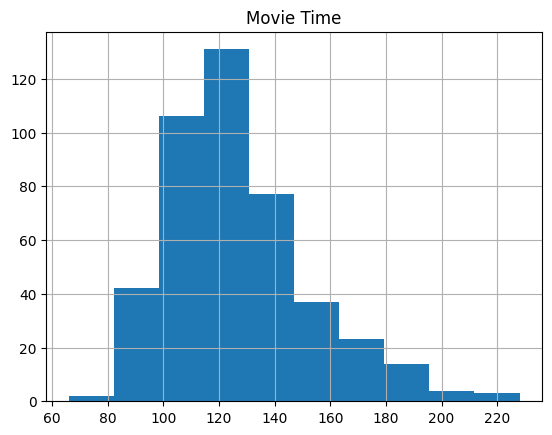

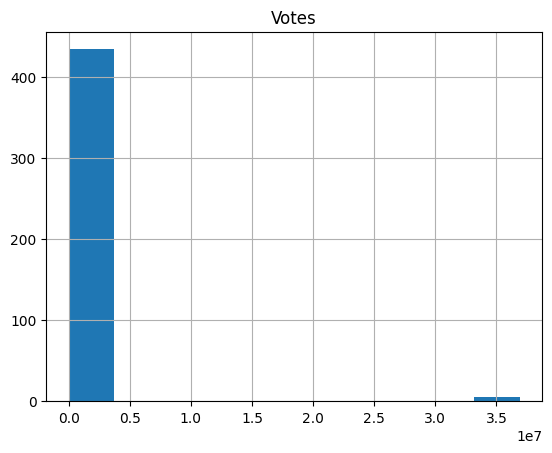

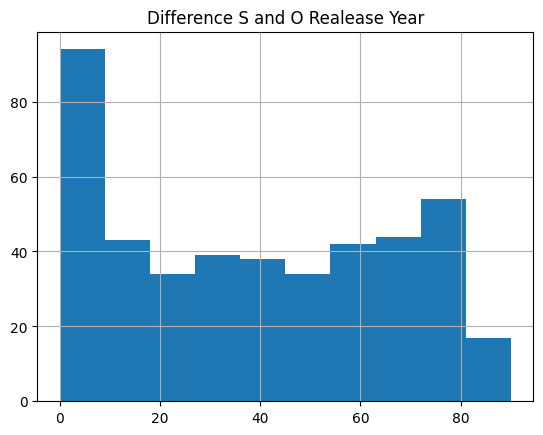

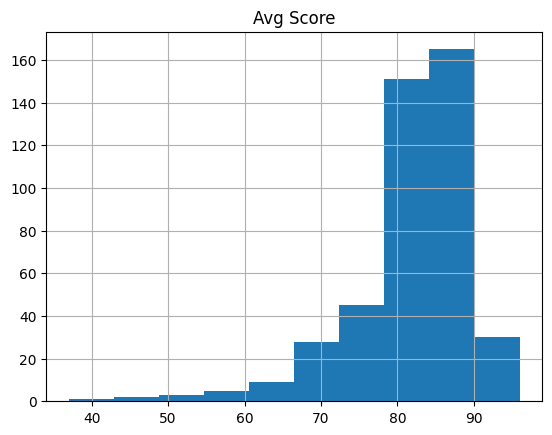

In [47]:
columns = ['Movie Time','Votes','Difference S and O Realease Year', "Avg Score"]

for column in columns:
    df.hist(column)

Заключение

* Выбросы затрудняют чтение данных в столбцах "Votes", "Avg Score", 'Movie Time'
* На гистограмме данные столбца "Avg Score" смещены влево
* Данные столбцов 'Votes' и 'Movie Time' смещены впарво

### Изучение и обработка выбросов

Учитывая приведенные выше результаты, столбцы, содержащие выбросы, — это "IMDB Votes", 'Tomatometer Count', 'Audience Count', "Avg Score" и 'Movie Time'. Создадим DataFrame без этих выбросов. Выбросы можно идентифицировать путем определения нижнего/верхнего предела нормального диапазона значений.

In [48]:
outlier = df[["Votes", "Avg Score", 'Movie Time']]
outlier

,Votes,Avg Score,Movie Time
0,15751,82,144
3,8703,37,100
6,1375,50,95
9,2402,72,87
13,7365,45,123
...,...,...,...
552,374599,82,136
553,137075,66,132
557,350360,87,209
559,1122354,80,122


In [49]:
Q1 = outlier.quantile(0.25)
Q1

Votes         22088.5
Avg Score        80.0
Movie Time      109.0
Name: 0.25, dtype: float64

In [50]:
Q3 = outlier.quantile(0.75)
Q3

Votes         485107.0
Avg Score         87.0
Movie Time       138.0
Name: 0.75, dtype: float64

In [51]:
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,Votes,Avg Score,Movie Time
0,15751,82,144
9,2402,72,87
18,25328,79,112
21,3620,79,86
27,18903,81,89
...,...,...,...
550,190933,79,119
551,153226,82,135
552,374599,82,136
559,1122354,80,122


In [52]:
index_list = list(data_filtered.index.values)

In [53]:
data_filtered = df[df.index.isin(index_list)]
data_filtered

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,...,Tomatometer Rotten Critics Count,Film ID,Day of Original Release,Day of Streaming Release,Month of Original Release,Month of Streaming Release,Year of Streaming Release,Difference S and O Realease Year,Avg Score,Votes
0,Wings,1927/28,Famous Players-Lasky,1,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...",...,3,2becf7d5-a3de-46ab-ae45-abdd6b588067,Friday,Monday,August,January,2017,90,82,15751
9,The Big House,1929/30,Cosmopolitan,0,1930,87,"Crime,Drama,Thriller",7.1,2079,"After being convicted of manslaughter, drunk d...",...,2,297aa285-29d7-4a22-b833-c5632ab3e562,Wednesday,Monday,May,April,2012,82,72,2402
18,Grand Hotel,1931/32,Metro-Goldwyn-Mayer,1,1932,112,"Drama,Romance",7.4,18314,"At a luxurious Berlin hotel between the wars, ...",...,6,be69f946-6adc-47e4-8491-79d6c033f59d,Friday,Tuesday,January,December,2016,84,79,25328
21,The Champ,1931/32,Metro-Goldwyn-Mayer,0,1931,86,"Drama,Sport",7.3,3003,Champ (Wallace Beery) is a down-on-his-luck bo...,...,1,c8994348-093e-4e22-8ffe-6ad3332a2bab,Saturday,Wednesday,November,January,2017,86,79,3620
27,42nd Street,1932/33,Warner Bros.,0,1933,89,"Comedy,Drama,Musical",7.4,11342,When revered Broadway director Julian Marsh (W...,...,1,1ad59370-1ed5-4d3a-a8c4-8571f95da168,Thursday,Monday,March,April,2012,79,81,18903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,The Favourite,2018,"Ceci Dempsey, Ed Guiney, Lee Magiday, and Yorg...",0,2018,119,"Biography,Comedy,Drama",7.5,183744,"In the early 18th century, England is at war w...",...,27,789c5253-e33e-4862-9cd6-6795271af717,Friday,Tuesday,November,February,2019,1,79,190933
551,Roma,2018,Gabriela Rodríguez and Alfonso Cuarón,0,2018,135,Drama,7.7,147705,Cleo is one of two domestic workers who help A...,...,17,1dc73d5e-4ae5-428e-a4f3-d465ffc9262d,Wednesday,Saturday,November,December,2018,0,82,153226
552,A Star Is Born,2018,"Bill Gerber, Bradley Cooper, and Lynette Howel...",0,2018,136,"Drama,Music,Romance",7.6,354157,Seasoned musician Jackson Maine discovers -- a...,...,52,a8a00610-8b95-4d5f-b95e-128b6a2853ea,Friday,Tuesday,October,January,2019,1,82,374599
559,Joker,2019,"Todd Phillips, Bradley Cooper, and Emma Tillin...",0,2019,122,"Crime,Drama,Thriller",8.4,1056051,"Forever alone in a crowd, failed comedian Arth...",...,182,9988cdef-854b-4e3d-8dc4-19e8e8717b9b,Friday,Thursday,October,October,2019,0,80,1122354


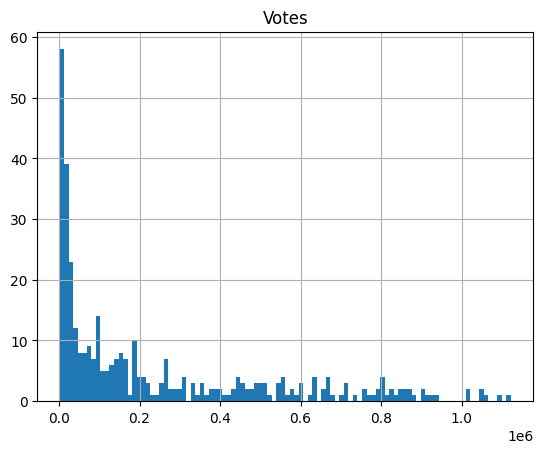

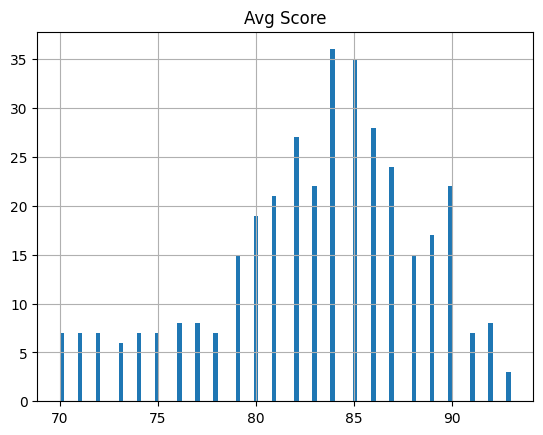

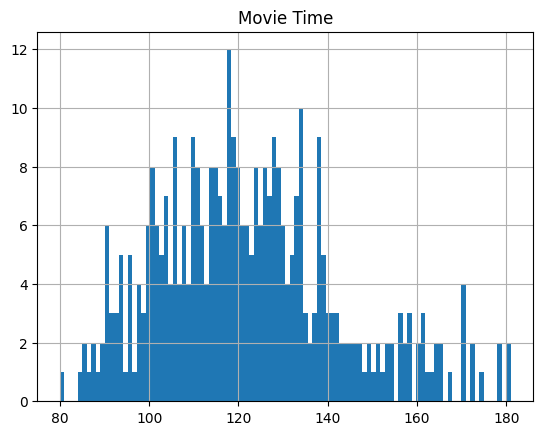

In [54]:
# создать гистограмму с отфильтрованным выбросом
filtered_outlier = data_filtered[["Votes", "Avg Score", 'Movie Time']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

### Изучение данных без выбросов

In [55]:
data_filtered.describe()[['Movie Time','Votes', "Avg Score"]]

,Movie Time,Votes,Avg Score
count,363.000000,3.630000e+02,363.000000
mean,122.336088,2.397202e+05,83.052342
min,80.000000,2.130000e+03,70.000000
25%,108.000000,2.248550e+04,80.000000
50%,120.000000,1.134980e+05,84.000000
75%,134.000000,3.932620e+05,87.000000
max,181.000000,1.122354e+06,93.000000
std,20.192649,2.810879e+05,5.334658


[[<Axes: title={'center': 'Votes'}>]]
[[<Axes: title={'center': 'Votes'}>]]


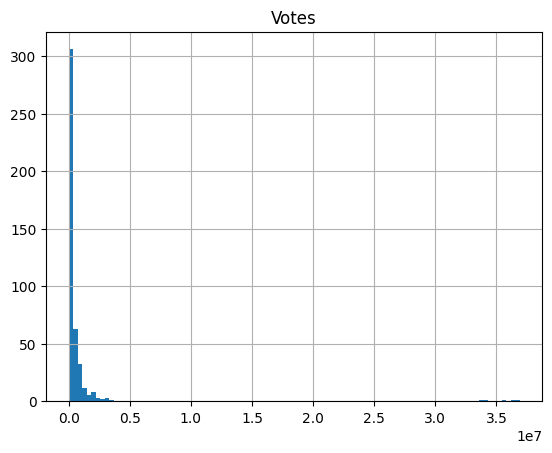

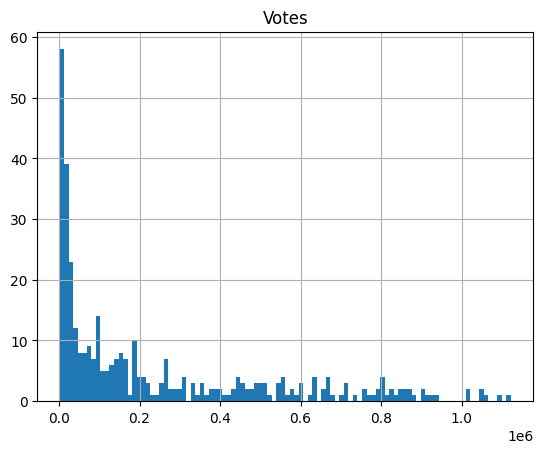

In [56]:
print (df.hist('Votes', bins=100))
print (data_filtered.hist('Votes', bins=100))

#### Заключение

- Выброс был уменьшен с максимального 35 000 000 до 1 100 000.. Гистограмма всё равно не вглядит понятной, потому что большого числа фильмов значение данного столбца колеблется в райное от 0 до1050 000. Среднее значение все еще выше медианы, поэтому гистограмма имеет наклон впарво


- На гистограмме видно, что большая часть числа оценок распределена в диапазоне 0 –100 0000. Максимальное число голосов составляет более 1 100 0000. Для диапазона более100 0000 значение начинает резко уменьшаться.

[[<Axes: title={'center': 'Avg Score'}>]]
[[<Axes: title={'center': 'Avg Score'}>]]


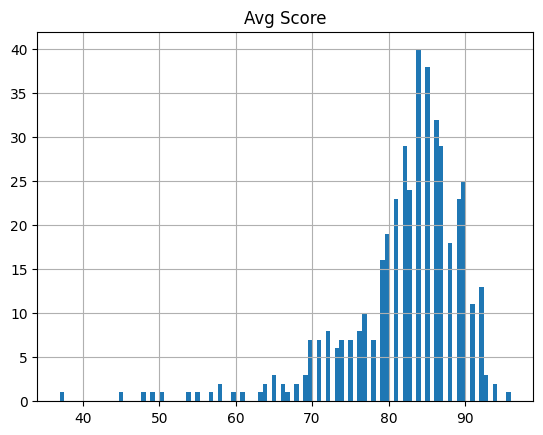

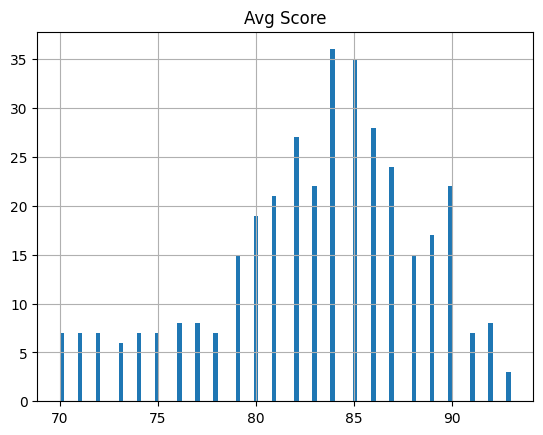

In [57]:
print (df.hist('Avg Score', bins=100))
print (data_filtered.hist('Avg Score', bins=100))

#### Заключение:
- Нижний порог по средней оценке фильма был увеличен с 40 до 70. Среднее значение почти совпадает с медианным, поэтому мы имеем диаграмму почти симметричного распределения. 

- Судя по гистограмме, средняя оценка колеблется в районе 80-90 баллов. Значит будем считать оценку нориальной. Если оценка превышает указанный диапазон, то будем считать фильм отличным, а если меньше, то фильм будет считать чуть ниже среднего .

[[<Axes: title={'center': 'Movie Time'}>]]
[[<Axes: title={'center': 'Movie Time'}>]]


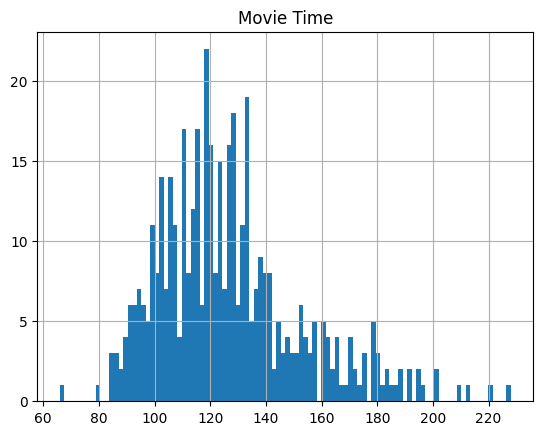

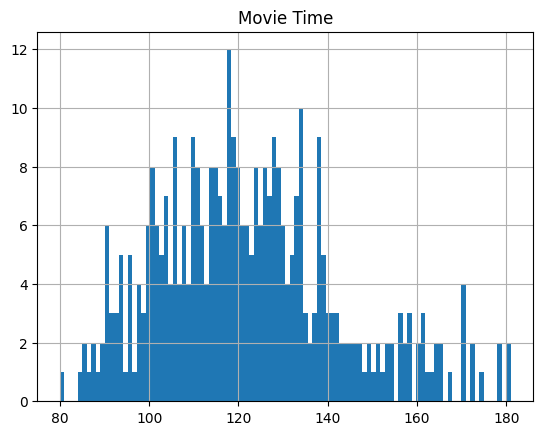

In [58]:
print (df.hist('Movie Time', bins=100))
print (data_filtered.hist('Movie Time', bins=100))

#### Заключение:
- Выброс по продолжительности фильмов был уменьшен с максимума 225 до 180. Среднее значение по-прежнему выше медианного, поэтому гистограмма отображается вправо. Диаграмма почти симметричного распределения.


- Судя по гистограмме, средняя продолжительность фильма составляет от 100 до 140 минут. При большей длительности фильм может называться долгим. при меньшней - коротким.

# Анализ по студиям

Проведём следующий анализ: найдём среднюю оценку фильма по студии продакшена, а также найдём число фильмов, которые были выпущены каждой студией

In [59]:
avg_score = data_filtered.pivot_table(index='Production Company', values='Avg Score', aggfunc='mean')
avg_score.sort_values(ascending=False ,by='Avg Score')

,Avg Score
Production Company,
Liberty Films,92.000000
Rialto Pictures,90.000000
Eagle-Lion Films,90.000000
Open Road Films,90.000000
Element Pictures,89.000000
...,...
Liongate Films,78.000000
Madacy Entertainment,77.000000
MCA Universal Home Video,77.000000


In [60]:
film_count = data_filtered.pivot_table(index='Production Company', values='Film ID', aggfunc='count')
film_count = film_count.sort_values(ascending=False, by ='Film ID' )
film_count = film_count.reset_index().reset_index()
film_count 

,index,Production Company,Film ID
0,0,Warner Bros. Pictures,39
1,1,Paramount Pictures,29
2,2,MGM Home Entertainment,25
3,3,20th Century Fox,24
4,4,Universal Pictures,19
...,...,...,...
58,58,21 Laps Entertainment,1
59,59,Nelson Entertainment,1
60,60,Open Road Films,1
61,61,Paramount Vantage,1


<Axes: xlabel='Production Company'>

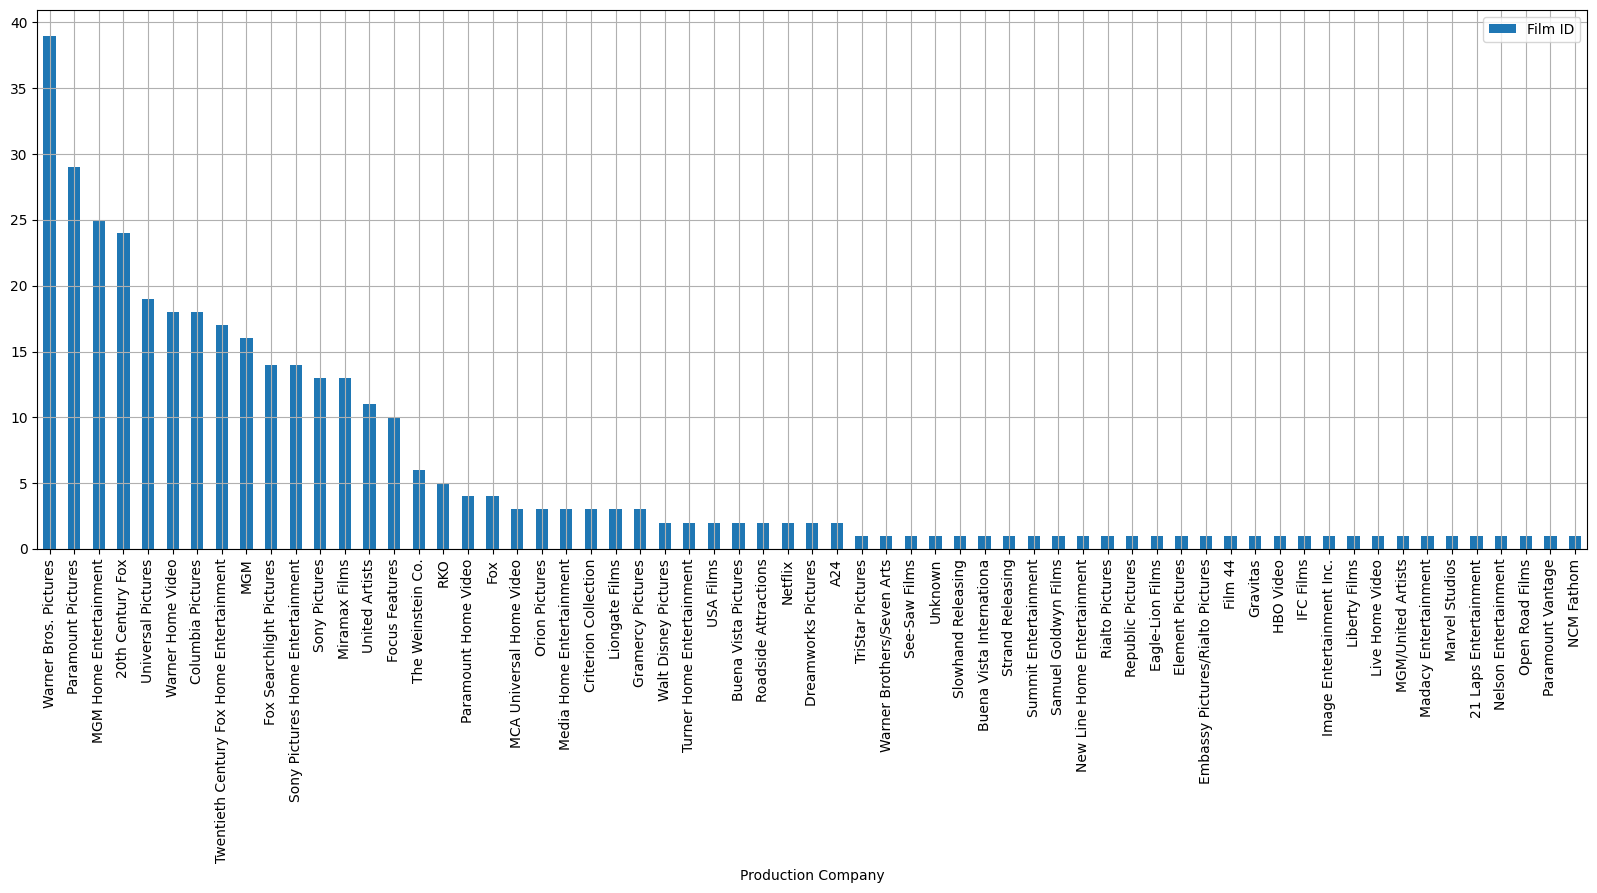

In [61]:
film_count.plot(grid=True, figsize=(20, 7), kind = 'bar', x='Production Company',y='Film ID')

#### Заключение
* Как мы видим, самая высокая средняя оценка фильмов у студий "Liberty Films", "Rialto Pictures", "Eagle-Lion Films" и "Open Road Films", это связано с малым числом фильмов данных студий, прдеставленных в датасете.
* Самое большое число фильмов у студий: "Warner Bros. Pictures" и "Paramount Pictures".

## Факторы, влияющие на оценку фильма

На оценку могут влиять следующие факторы:

* Продолжительность фильма
* Наличие оскара
* Рейтинг фильма
* Год выхода
* Число оценок

Для категориальных переменных (цвет и тип передачи) использовались прямоугольные диаграммы, а для остальных — диаграммы рассеяния. При анализе категориальных переменных категории должны содержать не менее 50 объявлений, чтобы их можно было анализировать.
Матрица корреляции и графики корреляции будут использоваться для оценки силы и направления линейных связей между парами переменных.

In [62]:
data_filtered = data_filtered.rename (
    columns = {
        'Production Company' : 'Production_Company'
    }
)

In [63]:
# Отфильтровано 2 популярные студии
warner = data_filtered.query('Production_Company == "Warner Bros. Pictures"')
paramount = data_filtered.query('Production_Company == "Paramount Pictures"')

Text(0.5, 1.0, 'Paramount Pictures')

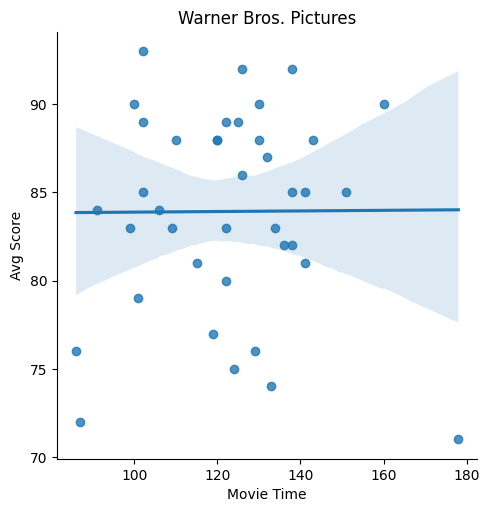

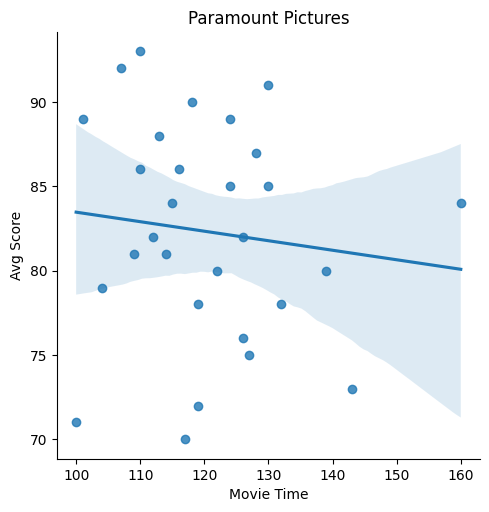

In [65]:
sns.lmplot(x="Movie Time", y="Avg Score", data=warner)
plt.title('Warner Bros. Pictures')
sns.lmplot(x="Movie Time", y="Avg Score", data=paramount)
plt.title('Paramount Pictures')

In [70]:
# вычисление корелляции
time_warner = warner[['Movie Time','Avg Score']]
corr_warner = time_warner.corr()
time_paramount = paramount[['Movie Time','Avg Score']]
corr_paramount = time_paramount.corr()

In [71]:
round(corr_warner,3)

,Movie Time,Avg Score
Movie Time,1.000,0.006
Avg Score,0.006,1.000


In [72]:
round(corr_paramount,3)

,Movie Time,Avg Score
Movie Time,1.000,-0.114
Avg Score,-0.114,1.000


### Заключение

Оценка фильмов "Warner Bros. Pictures" не зависит от их продолжительности. Ситуации с "Paramount Pictures" иная: с продолжительностью фильмов слегка падает их оценка.

Text(0.5, 1.0, 'Paramount Pictures')

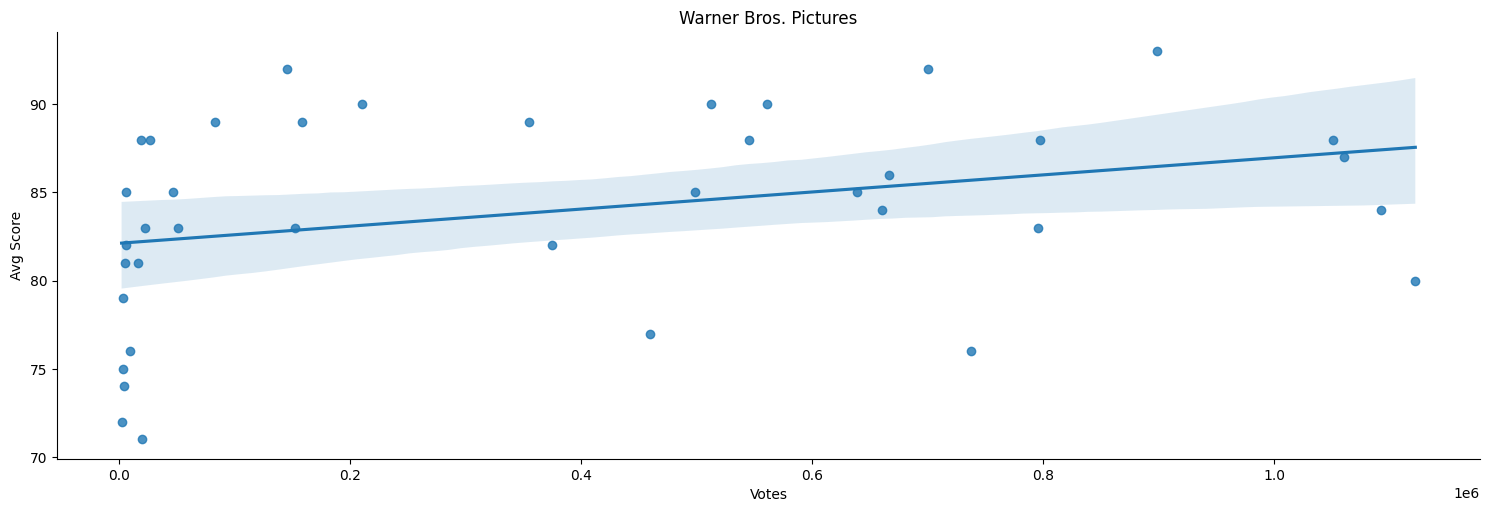

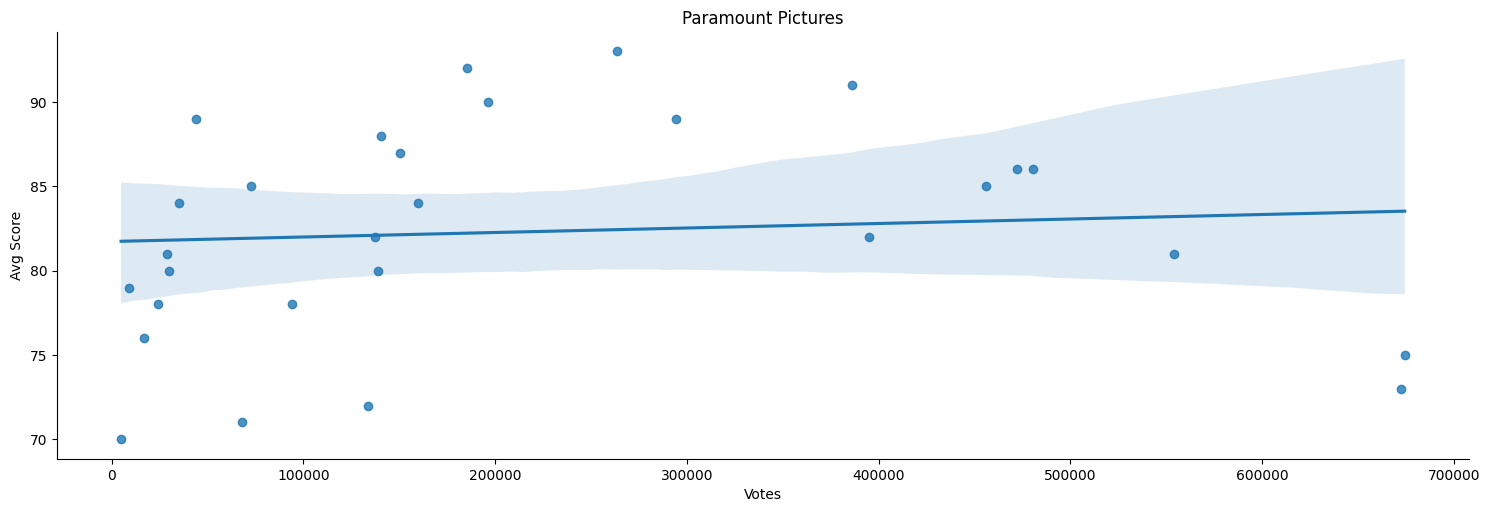

In [69]:
sns.lmplot(x="Votes", y="Avg Score", data=warner, height = 5, aspect =3)
plt.title('Warner Bros. Pictures')
sns.lmplot(x="Votes", y="Avg Score", data=paramount, height = 5, aspect =3)
plt.title('Paramount Pictures')

In [74]:
# вычисление корелляции
vote_warner = warner[['Votes','Avg Score']]
corr_warner = vote_warner.corr()
vote_paramount = paramount[['Votes','Avg Score']]
corr_paramount = vote_paramount.corr()

In [75]:
round(corr_warner,3)

,Votes,Avg Score
Votes,1.000,0.321
Avg Score,0.321,1.000


In [76]:
round(corr_paramount,3)

,Votes,Avg Score
Votes,1.000,0.085
Avg Score,0.085,1.000


### Заключение

Оценки фильмов "Warner Bros. Pictures" и "Paramount Pictures" растут с их числом, но рост оценок у "Warner Bros. Pictures" сильнее заметен  и значителен.

Text(0.5, 1.0, 'Paramount Pictures')

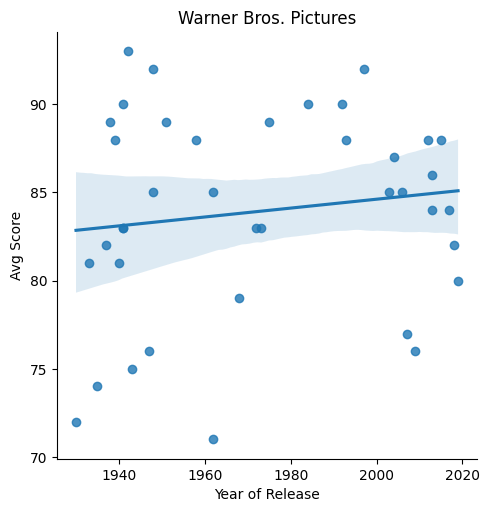

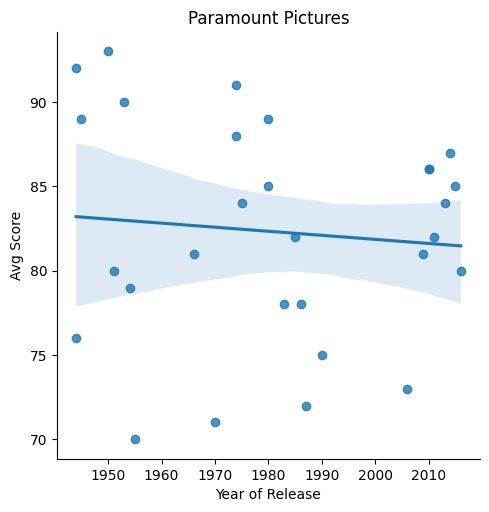

In [77]:
sns.lmplot(x="Year of Release", y="Avg Score", data=warner)
plt.title('Warner Bros. Pictures')
sns.lmplot(x="Year of Release", y="Avg Score", data=paramount)
plt.title('Paramount Pictures')

In [78]:
# вычисление корелляции
year_warner = warner[['Year of Release','Avg Score']]
corr_warner = year_warner.corr()
year_paramount = paramount[['Year of Release','Avg Score']]
corr_paramount = year_paramount.corr()

In [79]:
round(corr_warner,3)

,Year of Release,Avg Score
Year of Release,1.000,0.138
Avg Score,0.138,1.000


In [80]:
round(corr_paramount,3)

,Year of Release,Avg Score
Year of Release,1.000,-0.093
Avg Score,-0.093,1.000


### Заключение

С годами оценка фильмов "Warner Bros. Pictures" растёт, а у "Paramount Pictures" падает.

<Axes: title={'center': 'Avg Score'}, xlabel='Award'>

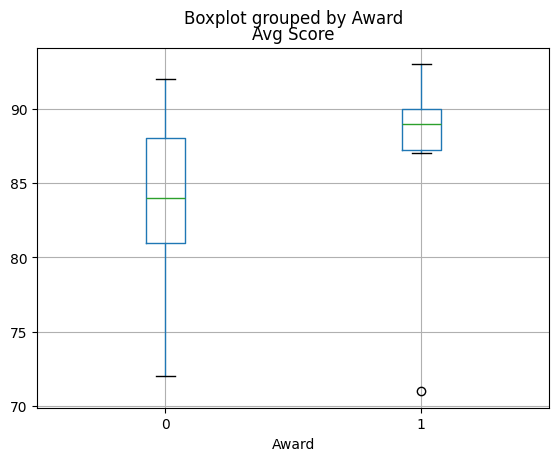

In [93]:
warner.boxplot(by ='Award', column =['Avg Score'], grid = True)

<Axes: title={'center': 'Avg Score'}, xlabel='Award'>

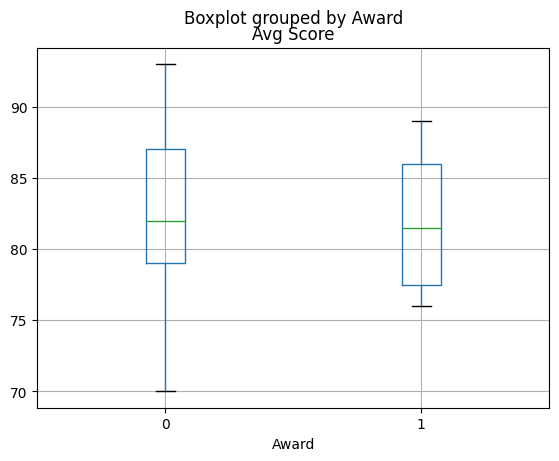

In [82]:
paramount.boxplot(by ='Award', column =['Avg Score'], grid = True)

### Заключение

Наличие оскара влияет на оценку фильмов "Warner Bros. Pictures", причём в лучшую сторону. Для фильмов "Paramount Pictures" ситуация чуть иная: наличие оскра почти не влияет на оценку фильмов, так как даже средняя оценка почти совпадает.

<Axes: title={'center': 'Avg Score'}, xlabel='Content Rating'>

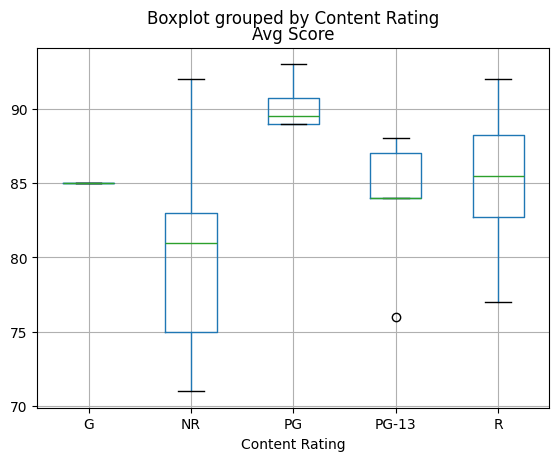

In [83]:
warner.boxplot(by ='Content Rating', column =['Avg Score'], grid = True)

<Axes: title={'center': 'Avg Score'}, xlabel='Content Rating'>

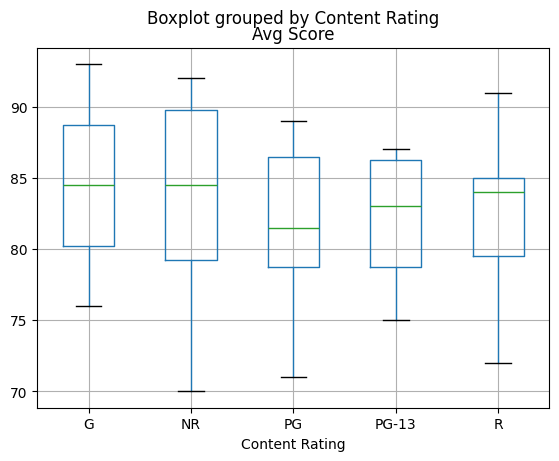

In [84]:
paramount.boxplot(by ='Content Rating', column =['Avg Score'], grid = True)

### Заключение

1. У компании "Warner Bros. Pictures" наибольшую среднюю оценку получают фильмы с рейтингом PG, а наименьшую фильмы, не имеющие рейтинг, а значит рейтинг фильма влияет на его оценку.
2. У комапании "Paramount Pictures" рейтинг фильма почти никак не влияет на его оценку, хотя фильмы рейтинга G чуть более успешены.


# Общие выводы

*Заполнение пропущенных значений*

- Отсутствующее значение стобцов "Critic Consensus", "Movie Info", "Directors", "Authors" были запонены unknown'ами
- Недостающее значение в столбце "Streaming Release Date" может быть заполнено в зависимости от большинства для фильмов данной студии.
- Отсутствующее значение столбца "Audience Status" может быть заполнено в зависимости от значения столбца "Audience Rating".

*Изменение типа данных:*

- Тип данных столбцов 'Original Release Date' и "Streaming Release Date" изменены на тип данных 'дату и время';
- Тип данных столбцов 'Year of Release', 'Movie Time', 'IMDB Votes', 'Tomatometer Rating', 'Tomatometer Count', 'Audience Rating', 'Audience Count', 'Tomatometer Top Critics Count', 'Tomatometer Fresh Critics Count' и 'Tomatometer Rotten Critics Count' тип данных столбца с плавающей запятой изменен на int.

*Редактирование данных:*

- Добавили значения года выхода фильма в стриминговый релиз.
- Добавили разницу между годами стримингового релиза и оригинального.
- Добавили среднюю оценку для каждого фильма.
- Добавили общее число оценок для каждого фильма.
- Проверка дублированных данные и их удаление.

*Проверка выбросов:*

Выбросы параметров: Movie Time Votes, Difference S and O Realease Year, Avg Score.
На гистограмме данные столбца "Avg Score" смещены влево.
А данные столбцов 'Votes' и 'Movie Time' смещены впарво

*Удаление выбросов:*

- Определили нижний и верхний пределы выбросов и сохранили их в отдельном DataFrame.
- Выполнили сравнение, используя гистограмму данных, которые содержат выбросы и не содержат выбросов. Сравнение показало, что гистограмма без выбросов позволяет легко исследовать среднее, медианное значение в данных столбцов.

*Изучение оценочного фактора:*

Факторы, влияющие на оценку: продолжительность фильма, наличие оскара, рейтинг фильма, год выхода, число оценок.
Продолжительность фильма, число оценок и год выхода используют метод диаграммы рассеяния, а остальные используют коробчатую диаграмму для исследования.
Результат:-

*Продолжительность фильма*

Так как коэффициент корелляции небольшой, то продолжительность фильма почти не влияет на его оценку.

*Число оценок*

Коэффициент корелляции для данной характеристики у фильмов компании "Warner Bros. Pictures" довольно велик, а значит число оценок всё же влияет на итоговую оценку их фильмов. Для "Paramount Pictures" ситуация иная: коэффициент корелляциии довольно мал, а значит число оценок почти не влияет на итоговую оценку фильма данной студии. В общем, влияние данной характеристи на среднюю оценку фильма зависит от студии, снявшей фильм.

*Год выхода*

Год выхода оказывает некое влияние на среднюю оценку фильмов, но это влияние довольно мало, так как модуль коэффициента корелляции данной характеристикии для обоих студий не превышвет 0.1.

*Наличие оскара*

Наличие оскара оказывает влияние на оценку фильма. Однако, это влияние зависит от студии, выпускающей фильм. 

*Рейтинг фильма*

Рейтинг фильма также оказывает влияние на его итоговую оценку. Но для разных студий это влияние разное: у одной студии могут быть более успешны фильмы с рейтингом PG, а у другой с рейтингом G.